# Εξέταση IΙI - Επιστημονική χρήση Python

- - - 

### Άσκηση 1 (βαθμοί: 3)

Το αρχείο 'vostok.txt' περιέχει δεδομένα από πυρήνες πάγου στην Ανταρκτική. Καθώς το χιόνι που πέφτει είναι αρχικά αφρώδες και περιέχει αέρα, ο πάγος που τελικά δημιουργείται ακόμα κρατά απομεινάρια αυτού του (πολύ) παλιου αέρα (μέχρι και 900 000 χρόνια πριν). Επομένως, η εξέταση της σύστασης των αερίων σε αυτούς τους πυρήνες μας δίνουν πληροφορίες για το κλίμα του παρελθόντος. 

Οι στήλες περιέχουν :

- age  : ηλικία του αέρα (σε χρόνια πριν από το σήμερα)
- dT   : διαφορά θερμοκρασία με τον μέσο όρο της σημερινής (°C)
- CO2  : συγκέντρωση του διοξειδίου του άνθρακα (σε ppm)
- dust : συγκέντρωση σκόνης (σε ppm)

(Πηγή: Petit, et al. 1999)

Διαβάστε το αρχείο και κάντε ένα διάγραμμα της θερμοκρασίας (y) με την συγκέντρωση σκόνης (x). Κάντε προσαρμογή καμπύλης για να βρείτε τις παραμέτρους της σχέσης που συνδέει τις δύο αυτές μεταβλητές (δίνεται ότι $ y = a  e^{-b x} - c$). Αφού βρείτε τις παραμετρους και τα σφάλματά τους κάντε ένα διάγραμμα των δεδομένων, της γραμμής που χαρακτηρίζει την βέλτιστη προσαρμογή, καθώς και την περιοχή που ανταποκρίνεται στα 5σ.  

a = 7.276336
b = 7.820083
c = -7.650320

a = 7.276336 +/- 0.103522
b = 7.820083 +/- 0.286665
c = -7.650320 +/- 0.074618


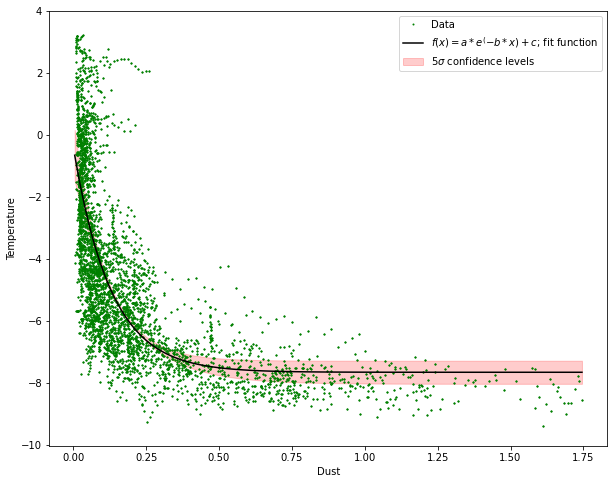

In [73]:
# Try it here!
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy as np
df=pd.read_csv("data_files_exam-III/vostok.txt",delimiter='	')
df
df=pd.DataFrame(df)
df.dropna(inplace=True)
df
plt.figure(figsize=[10,8])
plt.plot(df['dust'],df['dT'],'go',ms=1)
plt.xlabel('Dust')
plt.ylabel('Temperature')
def model(x, a, b, c):
    return (a*np.exp(-b*x))+c
popt, pcov = so.curve_fit(model,df['dust'],df['dT'])
popt
print("a = %f" % (popt[0]))
print("b = %f" % (popt[1]))
print("c = %f" % (popt[2]))
pcov
p_sigma = np.sqrt(np.diag(pcov))
p_sigma
print()
print("a = %f +/- %f" % (popt[0], p_sigma[0]))
print("b = %f +/- %f" % (popt[1], p_sigma[1]))
print("c = %f +/- %f" % (popt[2], p_sigma[2]))
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(df['dust']), max(df['dust']), 100)
y_model = model(x_model, a_opt, b_opt, c_opt)
x_model = np.linspace(min(df['dust']), max(df['dust']), 100)
y_model = model(x_model, a_opt, b_opt, c_opt)
plt.xlabel('Dust')
plt.ylabel('Temperature')
plt.ylim(ymax=4)
nstd = 5.
popt_up = popt + nstd * p_sigma 
popt_low = popt - nstd * p_sigma
y_fit_up = model(x_model, *popt_up)
y_fit_low = model(x_model, *popt_low)
plt.xlabel('Dust')
plt.ylabel('Temperature')
plt.plot(df['dust'],df['dT'],'go',ms=1,label='Data')
plt.plot(x_model, y_model, color='k', label=r'$f(x) = a*e^(-b*x) + c$; fit function')
plt.fill_between(x_model, y_fit_up, y_fit_low, 
                 alpha=0.2, color='r', 
                 label=r'5$\sigma$ confidence levels')
plt.legend(loc='upper right')

### Άσκηση 2  (βαθμοί: 2)

Στο αρχείο 'distributions.txt' θα βρείτε 4 στήλες που η κάθε μια αντιστοιχεί σε ένα δείγμα μια κατανομής. Ορίζοντας το επίπεδο  σημαντικότητας στο 0.05, χρησιμοποιήστε το τεστ Kolmogorov-Smirnov για να ελέγξετε το αποτέλεσμα για τους συνδυασμός των δειγμάτων 1 και 2, καθώς και 3 και 4. Τι συμπεραίνετε σχετικά με την μηδενική υπόθεση (και άρα τις κατανομές) σε κάθε περίπτωση;


In [35]:
# Try it here!
import numpy as np
import scipy.stats as st
from scipy.stats import norm
data1=np.loadtxt("data_files_exam-III/distributions.txt",delimiter=',',skiprows=1)
print(data1)
alpha = 0.05
x1=data1[:,0]
x2=data1[:,1]
x3=data1[:,2]
x4=data1[:,3]
statistic1, pvalue1  = st.ks_2samp(data1[:,0], data1[:,1])
print()
print("For the first set:")
print(f"Statistic 1 = {statistic:.3g}")
print(f"p-value 1  = {pvalue:.3g}") 
print()
statistic2, pvalue2  = st.ks_2samp(data1[:,2], data1[:,3])
print()
print("For the second set:")
print(f"Statistic 2 = {statistic:.3g}")
print(f"p-value 2  = {pvalue:.3g}")
print()
print("For the first pvalue:")
if pvalue1 <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
print()
print("For the second pvalue")
if pvalue2 <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    

[[ 1.76405235  0.65596268  1.76405235  0.55596268]
 [ 0.40015721  0.99247389  0.40015721  0.89247389]
 [ 0.97873798 -0.32231482  0.97873798 -0.42231482]
 ...
 [ 0.0941923   0.25843385  0.0941923   0.15843385]
 [-1.14761094 -1.04190142 -1.14761094 -1.14190142]
 [-0.35811408 -1.21097037 -0.35811408 -1.31097037]]

For the first set:
Statistic 1 = 0.045
p-value 1  = 0.263


For the second set:
Statistic 2 = 0.045
p-value 2  = 0.263

For the first pvalue:
    ...we reject the null hypothesis. ****

For the second pvalue
    ...we cannot reject the null hypothesis. ****


### Άσκηση 3  (βαθμοί: 3)

Στο αρχείο 'eqw_data.txt' περιέχονται μετρήσεις του "ισοδύναμου πλάτους" ([equivalent width](https://en.wikipedia.org/wiki/Equivalent_width)) για δύο γραμμές σε κάποια άστρα μεγάλης μάζας. Διαβάστε το αρχείο και κάντε ένα αρχικό διάγραμμα. Πόσες ομάδες βλέπετε; 

Στη συνέχεια χρησιμοποιείστε τον αλγόριθμο Kmeans για να βρείτε τον αριθμό ομάδων για το συγκεκριμένο πρόβλημα. Κάντε ένα τελικό διάγραμμα που θα απεικονίζονται τα δεδομένα (μετρήσεις) και τις ομάδες που ανήκουν. Πως σχετίζεται το αποτέλεσμα με αυτό που βλέπατε πριν;  

[[ 0.34073351 -0.02132551]
 [ 0.69511696  0.06623919]
 [ 0.53338702 -0.04559986]
 ...
 [ 0.82419658  0.11109891]
 [ 0.65065494  0.16841883]
 [ 0.78249709  0.29681814]]


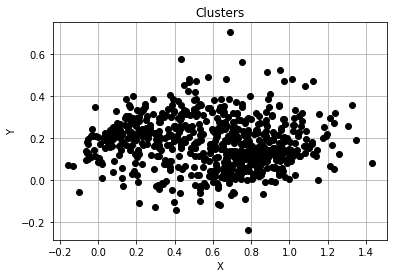

In [89]:
# Try it here!
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("data_files_exam-III/eqw_data.txt",delimiter=',',skiprows=1)
print(data)
plt.plot(data[:,0],data[:,1],'ko')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)


In [ ]:
Στο αρχικό διάγραμμα δεν διακρίνονται ξεκάθαρα οι ομάδες

/usr/local/anaconda3/envs/ph252/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No handles with labels found to put in legend.


Cluster centers:
[[0.81286642 0.15624935]
 [0.25634198 0.20258373]]



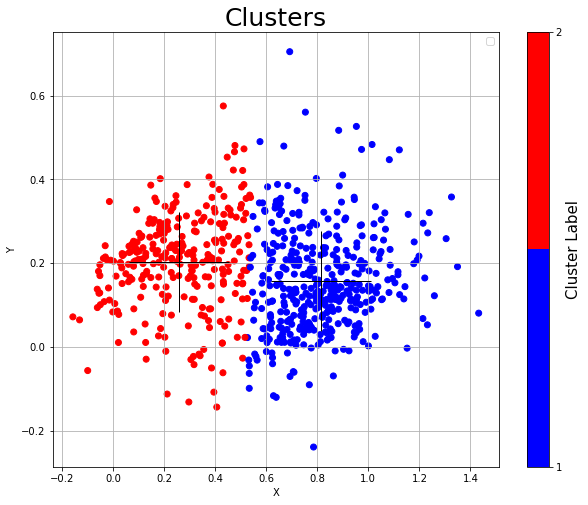

In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
Clusters_kmeans = 2
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
kmeans_model.fit(data)
print("Cluster centers:")
print(kmeans_model.cluster_centers_)
print()
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]
plt.figure(figsize=[10,8])
plt.plot(cc_x, cc_y, 'k+', ms=100)
new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( data[:,0],data[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label',fontsize=15)
plt.title('Clusters',fontsize=25)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)


-- working with 1 clusters...
-- working with 2 clusters...
-- working with 3 clusters...
-- working with 4 clusters...
-- working with 5 clusters...
-- working with 6 clusters...
-- working with 7 clusters...


/usr/local/anaconda3/envs/ph252/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/anaconda3/envs/ph252/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/anaconda3/envs/ph252/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/anaconda3/envs/ph252/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

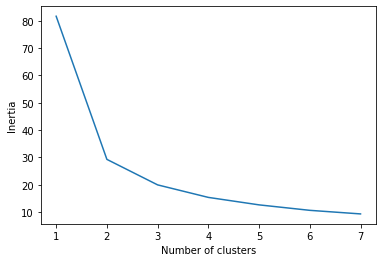

In [98]:
from sklearn import metrics

inert = []
xclusters = range(1,8)
for i in xclusters:
    print(f'-- working with {i} clusters...')
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(data)
    inert.append(kmeans_model.inertia_)
plt.plot( xclusters, inert)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
Φαίνεται ότι ο σωστός αριθμός ομάδων είναι δύο, διότι στο 2 μειώνεται ο ρυθμό αλλαγής της καμπύλης απότομα. 

### Άσκηση 4  (βαθμοί: 1)

Απαντήστε σύντομα στις παρακάτω ερωτήσεις:
    
Α. Ποια είναι η κύρια διαφορά μεταξύ του αλγορίθμου Kmeans και DBSCAN; 

Β. Τι σημαίνει υπερπροσαρμογή; και γιατί προσπαθούμε να την αποφύγουμε;

In [ ]:
# Write here!
Και οι δύο αλγόριθμοι χρησιμοποιούνται για ομαδοποίηση δεδομένων. Ωστόσο, στον αλγόριθμο Kmeans, ο αριθμός των ομάδων
k, πρέπει να καθοριστεί από την αρχή αντίθετα με τον αλγόριθμο DBSCAN, που ο αριθμός των ομάδων μπορεί να είναι
οποιοσδήποτε. Μία άλλη πολύ σημαντική διαφορά είναι ότι στον αλγόριθμο Kmeans οι ομάδες θεωρούνται ισοτροπικές, 
δηλαδή μπορεί να υπάρχει θέμα για ομάδες διαφορετικού σχήματος, ενώ στον αλγόριθμο DBSCAN δεν υπάρχει τέτοιος 
περιορισμός.

Υπερπροσαρμογή συμβαίνει όταν δίνουμε ΟΛΑ τα δεδομένα από το σετ εκπαίδευσης στον αλγόριθμο, οπότε αυτός τα 
"μαθαίνει απέξω" και προσαρμόζεται τέλεια σε αυτά. Οπότε όταν και αν εμφανιστούν νέα δεδομένα, υπάρχει μεγάλη 
πιθανότητα να τα ταξινομήσει εσφαλμένα. Αυτός είναι και ο λόγος που προσπαθούμε να την αποφεύγουμε, χρησιμοποιώντας
τον χρυσό κανόνα.

### Άσκηση 5  (βαθμοί: 1)

Σχολιάστε τον παραπάνω κώδικα, τι κάνει και γιατί ; (έστω ότι είναι γνωστά τα X_data, y_labels). 

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_data, 
                                                     y_labels, 
                                                test_size=0.3)


clf = tree.DecisionTreeClassifier()
clf = clf.fit( X_data, y_labels)
y_pred = clf.predict(X_test)

In [ ]:
# Write here!
Τα σετ X_train-y_train και X_test-y_test είναι αντίστοιχα τα σετ εκπαίδευσης/δοκιμής. Οπότε, το πρώτο βήμα του 
κώδικα είναι να υπολογίσει αυτά τα ζεύγη από τα αρχικά δεδομένα. Έπειτα, φορτώνεται το μοντέλο που πρόκειται να
χρησιμοποιηθεί,δηλαδή τα δέντρα απόφασης, με την εντολή clf = tree.DecisionTreeClassifier(). Στη συνέχεια κάνουμε 
fit στο μοντέλο που φορτώσαμε τα συγκεκριμένα δεδομένα μαζί με τις ετικέτες τους. Τέλος, χρησιμοποιούμε το δέντρο 
απόφασης που φτιάξαμε για να κάνουμε μία πρόβλεψη για το αποτέλεσμα που υπολογίζουμε. Άρα, ουσιαστικά γίνεται 
διαχωρισμός των δειγμάτων, υπολογισμός και πρόβλεψη αποτελέσματος.

In [ ]:
# EOF